# Project 3. Clustering and Manifold Learning

### Student ID:915942842
### Student Name: Xuecheng Zhang

In [60]:
# Note: Do not change anything

import numpy as np
from numpy import genfromtxt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.image import imread

import os
from sklearn import manifold
from sklearn import cluster
%matplotlib inline

## Part 1. Image segmentation using $k$-means

Perform a segmentation analysis on the following photo. The data folder includes data.png (credit to WYM) along with $48$ feature files (and recall that the image itself has color information). Each feature contains certain information extracted from the image. The type of information (the features) extracted is different in every file. 

Provide two segmentation plots by using appropriate subsets of the features. At least one of them should identify all the pixels belonging to the face region, and the other one is up to you to choose. However, **you need explain your rational** (why did you use specific features etc.)

Hint: Carefully choose the features. To make an informed choice of features, use imshow to plot each feature to understand what features are extracted.

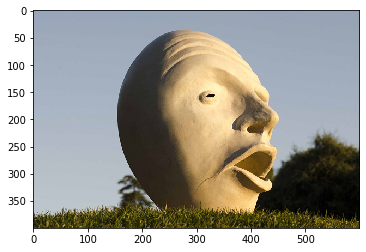

In [5]:
im = imread('data.png')
plt.imshow(im)

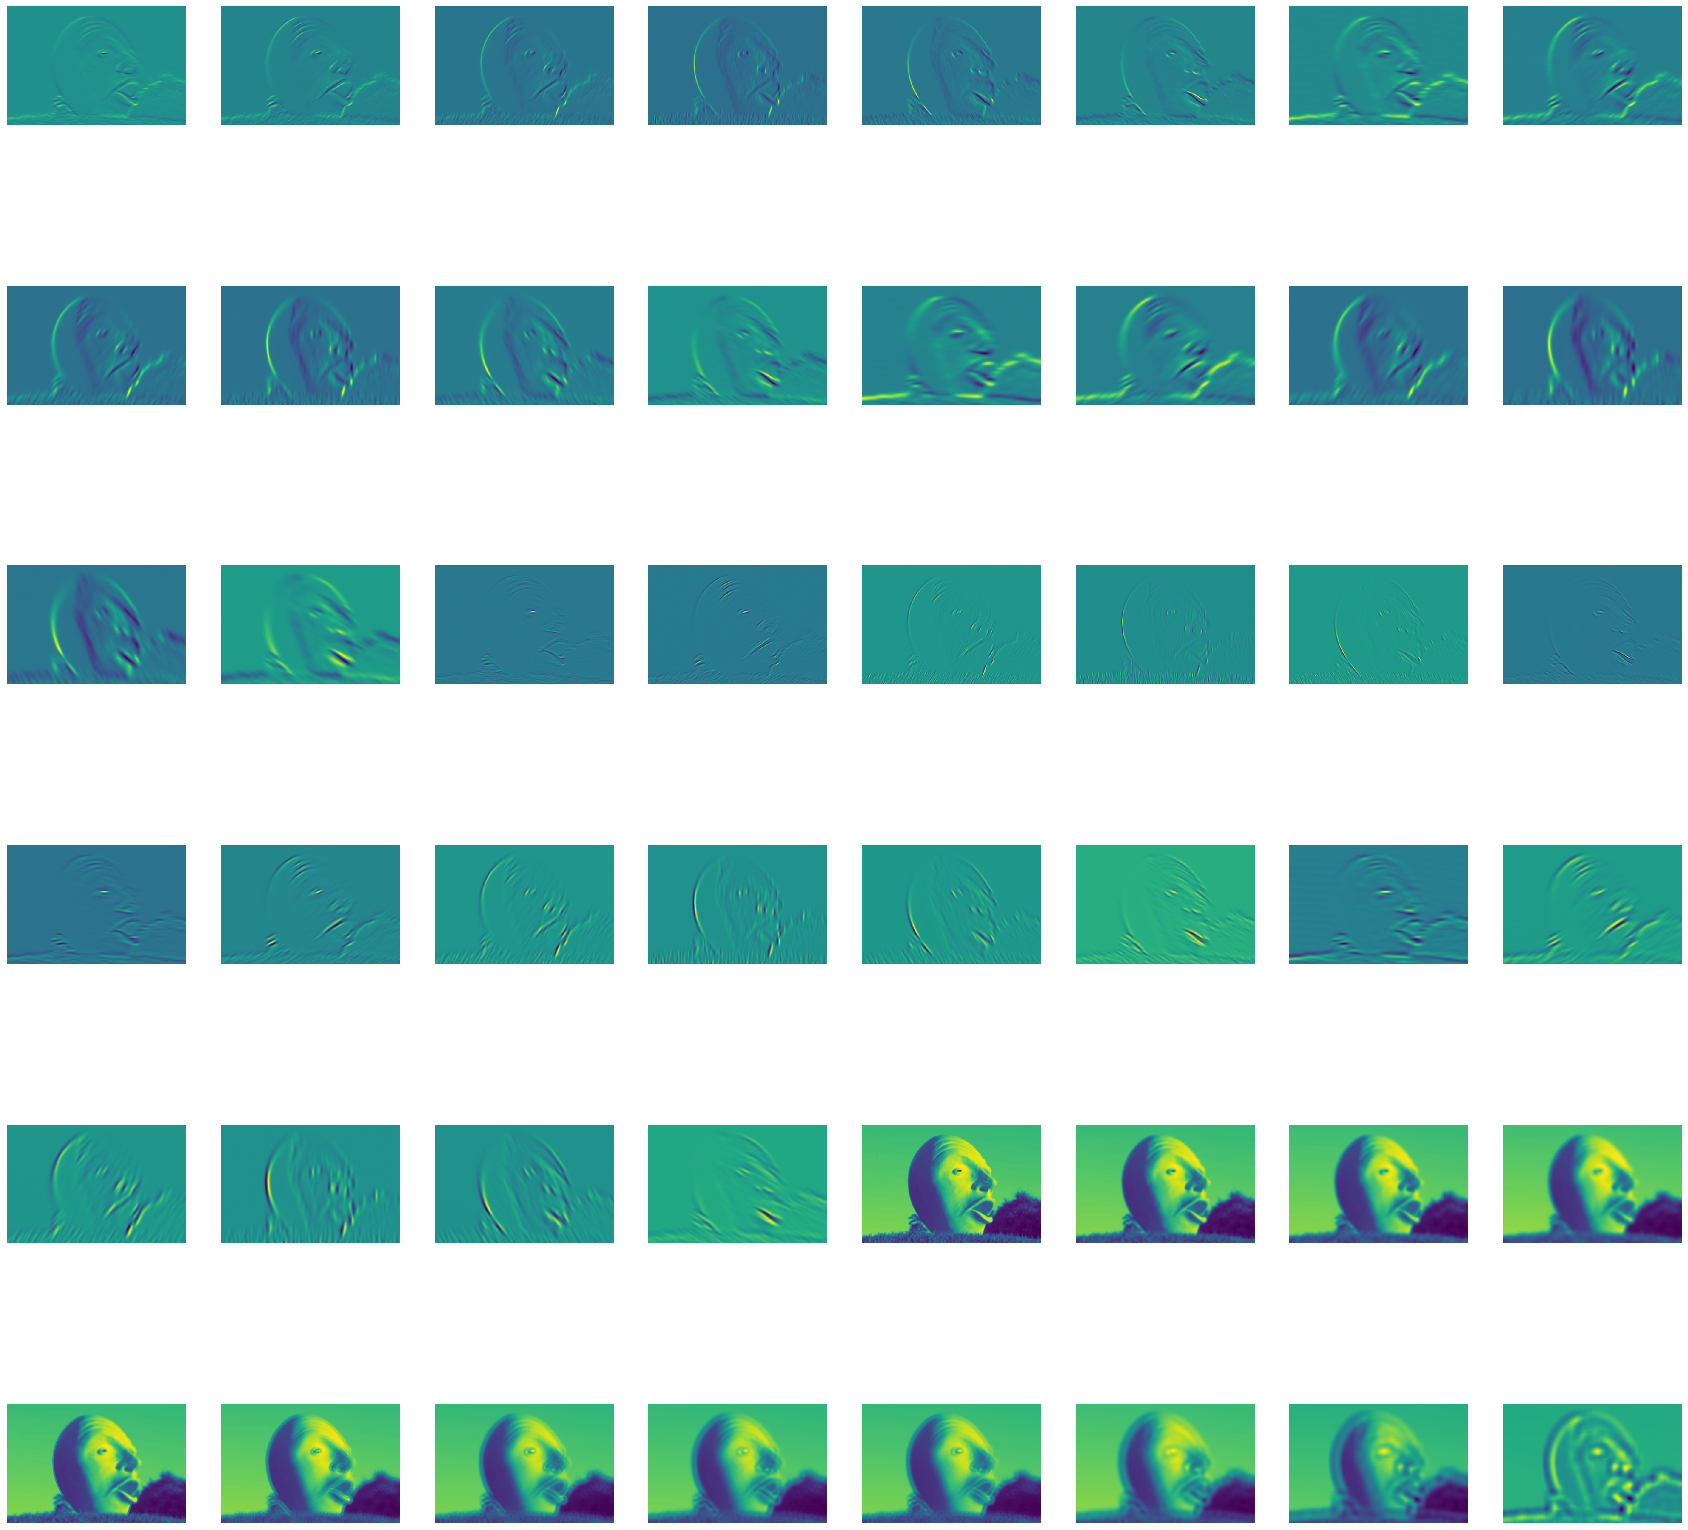

In [9]:
#code from TA

cd = os.getcwd()

li = []

ax = plt.figure(figsize=(30,30))

for i in range(0,48):
    num = str(i)
    file_to_open = os.path.expanduser(cd+"/features/feature"+num)
    df = pd.read_csv(file_to_open, index_col=None, header=None)
    plt.subplot(6,8,i+1)
    plt.imshow(df)
    plt.axis('off')
    li.append(df)

In [46]:
from sklearn.cluster import KMeans
im = imread('data.png') # RGB channels

#.png file. im[:,:,0] R
#.png file. im[:,:,1] G
#.png file. im[:,:,2] B
#.png file. im[:,:,3] mask

im=im[:,:,:3]

feature = np.zeros( (im.shape[0],im.shape[1],51))
feature[:,:,:3]=im

for i in range(48):
    feature[:,:,i+3]=genfromtxt('./features/feature'+str(i),delimiter=',')

feature[0,0,:]

mydata = [x for y in feature[:,:, [6,37,4,8]] for x in y]#I try one by one
kmeans_cluster = KMeans(n_clusters=10)
kmeans_cluster.fit(mydata)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


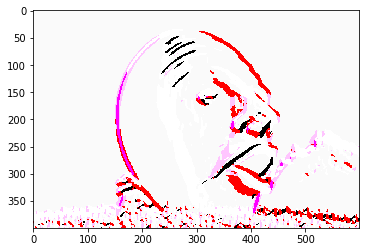

In [47]:
plt.imshow(cluster_centers[cluster_labels].reshape(400,600,4))

In [14]:
mydata1 = [x for y in feature[:,:, [37,39,30,0]] for x in y]
kmeans_cluster1 = KMeans(n_clusters=10)
kmeans_cluster1.fit(mydata1)
cluster_centers1 = kmeans_cluster1.cluster_centers_
cluster_labels1 = kmeans_cluster1.labels_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


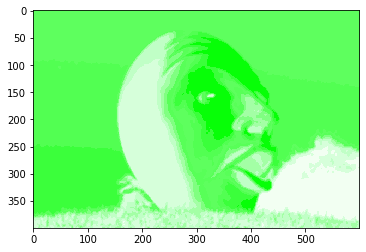

In [15]:
plt.imshow(cluster_centers1[cluster_labels1].reshape(400,600,4))

I identify all the pixels belonging to the green(or shadow) region, after 36 of feature, I can clear see the shadow on the right bottom, so I choose three of them.

## Part 2. mean-shift path

Plot the mean shift path for the attached dataset mean_shift.csv.

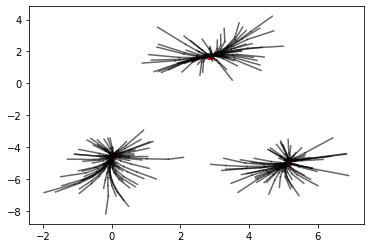

In [4]:
filename='mean_shift.csv'
data = pd.read_csv(filename,header=None).values
#clustering = MeanShift(bandwidth=2).fit(df)
#labels=clustering.labels_.tolist()
#plt.scatter(df[:,0],df[:,1],c=labels)


def psi(x,tuning):
    temp=np.exp(-tuning*np.sum(np.square(x)))
    return(temp)
# Calculate sum of weights

def weights_sum(old_point,tuning,neighbors):
    Temp = 0
    for row in neighbors: 
        Temp += psi(np.array(old_point) - row,tuning)
    return(Temp)

def new_point(old_point,tuning,neighbors):
    z = np.array([0,0])
    w = 0
    sum_ = weights_sum(old_point,tuning,neighbors)
    for row in neighbors:
        w = psi(np.array(old_point) - row,tuning) / sum_ 
        z = z + w*np.array(row)
        #print(w)
    return(z)

#old_pt = np.array([-1,-1])   # starting point
# old_pt = data[2,:]

bandwidth = 1.5
tuning = 1/bandwidth**2

#for row in np.array([data[0,:]]):
for row in data:
    not_converge = True
    old_pt = row
    #ax.scatter(old_pt[0], old_pt[1],color = 'red' , marker = 'o', s = 20,alpha=0.6)
    while not_converge:
        new_pt = new_point(old_pt,tuning,data)
        #ax.scatter(new_pt[0], new_pt[1],color = 'red' , marker = 'o', s = 20,alpha=0.6)
        plt.plot([old_pt[0],new_pt[0]], [old_pt[1],new_pt[1]],color = 'black',alpha=0.6)
        #print(new_pt)
        not_converge = np.sum(np.square(old_pt - new_pt)) > 0.0001
        if not_converge == False:
            plt.scatter(new_pt[0], new_pt[1],color = 'red' , marker = 'o', s = 30)
        old_pt = new_pt


Perform clustering task on the dataset comparing_cluster_methods.csv. Use DBSCAN, k-means and mean shift. Plot and compare the results. Find the methods that are able to seperate the three clusters (of course one needs to find a good tuning parameter by trial-and-error to get the perfect result), and explain why they are able to do so and why the remaining methods are not able to.

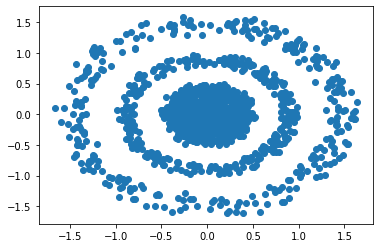

In [18]:
filename='comparing_cluster_methods.csv'
data2 = pd.read_csv(filename,header=None).values
plt.scatter(data2[:,0], data2[:,1])
plt.show()

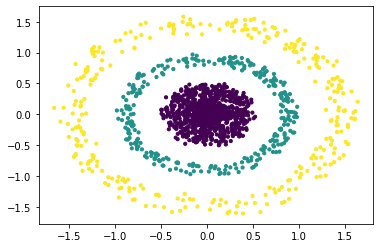

In [6]:
#DBSCAN

dbscan = cluster.DBSCAN(eps=0.21)
dbscan.fit(data2)
lable=dbscan.labels_
plt.scatter(data2[:, 0], data2[:, 1], s=10, c=lable)
plt.show()

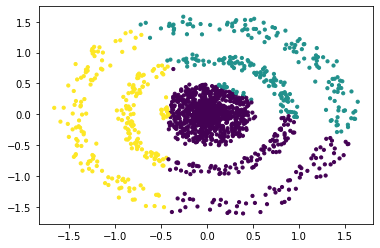

In [7]:
#k-means
kmean = cluster.KMeans(n_clusters=3)
kmean.fit(data2)
lable2=kmean.labels_
plt.scatter(data2[:, 0], data2[:, 1], s=10, c=lable2)
plt.show()

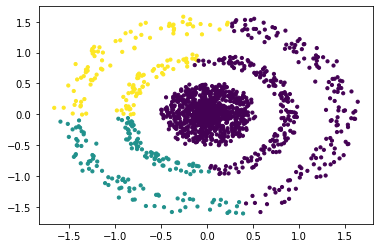

In [8]:
#mean shift
meanshift = cluster.MeanShift(bandwidth=0.62)
meanshift.fit(data2)
lable1=meanshift.labels_
plt.scatter(data2[:, 0], data2[:, 1], s=10, c=lable1)
plt.show()

At first, I plot the origenal shape, we can see clearly that we need devide it in to one big annulus, one small annulus and a circle. From this three plots, we can clear see that DBSCAN is better for data2. The reason is the algorithm of the cluster. The basic idea underlying the DBSCAN algorithm is that regions with a high density of data pointsform clusters, and that clusters areseparated by regions of low density.

## Part 4. Shape learning

Use any method to recover the shape of datasets 1~5. Provide the methods and describe the shape by both plots and words. The difficulty is ranked in order. We do not expect you to solve all the problems. 

Hint: for 3d plots, one can also plot it in python (outside the jupyter notebook environment) in order to change the viewing angles to have a better visual impression.

Hint: MDS and locally linear embedding are the ways to go for higher dimension data.

Dataset 1.

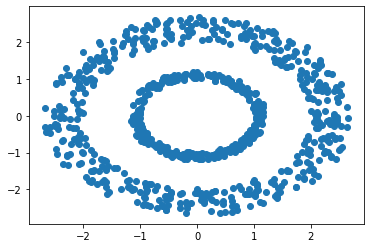

In [9]:
dataset1 = pd.read_csv('dataset1.csv',header=None).values
dataset1.shape
plt.scatter(dataset1[:, 0], dataset1[:, 1])
plt.show()

The shape of the dataset 1 is a annulus with a small annulus inside.

Dataset 2.

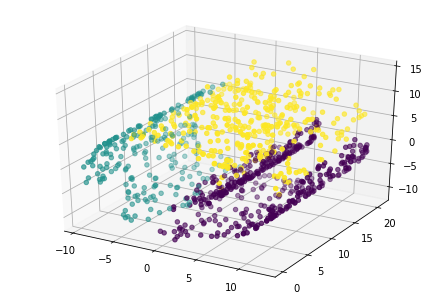

In [22]:
dataset2 = pd.read_csv('dataset2.csv',header=None).values

#
kmean = cluster.KMeans(n_clusters=3)
kmean.fit(dataset2)
lable5=kmean.labels_
ax = Axes3D(plt.figure())
ax.scatter(dataset2[:,0].tolist(), dataset2[:,1].tolist(),dataset2[:,2].tolist(), c=lable5, marker='o')


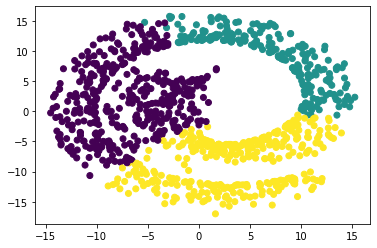

In [23]:
from sklearn import manifold
embedding = manifold.MDS(n_components=2)
dataset2_transformed = embedding.fit_transform(dataset2)
plt.scatter(dataset2_transformed[:, 0], dataset2_transformed[:, 1],c=lable5)
plt.show()

In 3D plot, I use KMeans to cluster it, but I still can not recognize its shape. Next I use MDS, the shape of dataset2 is a vortex.

Dataset 3.

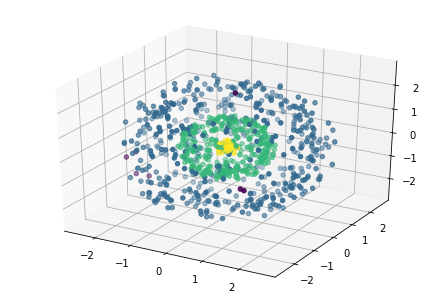

In [25]:
dataset3 = pd.read_csv('dataset3.csv',header=None).values
dataset3.shape
dbscan1 = cluster.DBSCAN(eps=0.63)
dbscan1.fit(dataset3)
lable6=dbscan1.labels_
ax = Axes3D(plt.figure())
ax.scatter(dataset3[:,0].tolist(), dataset3[:,1].tolist(),dataset3[:,2].tolist(), c=lable6, marker='o')
plt.show()

It looks like a ball or earth which have a core.

Dataset 4.

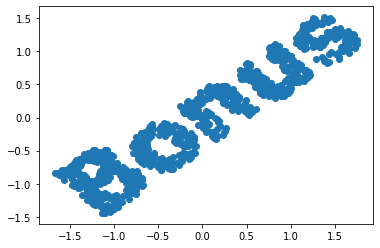

In [35]:
dataset4 = pd.read_csv('dataset4.csv',header=None).values
embedding = manifold.MDS(n_components=2)
dataset4_transformed = embedding.fit_transform(dataset4)
plt.scatter(dataset4_transformed[:, 0], dataset4_transformed[:, 1])
plt.show()

I use MDS to get the 2D plot, it is a shape of 'Bonus', and its direction is random.

Dataset 5.

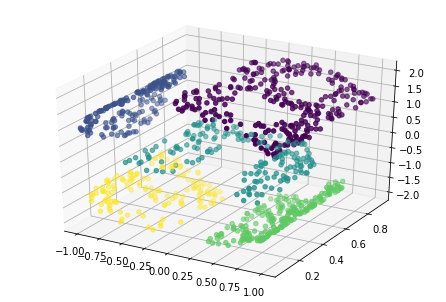

In [30]:
dataset5 = pd.read_csv('dataset5.csv',header=None).values
dataset5.shape
dbscan2 = cluster.DBSCAN(eps=0.2)
dbscan2.fit(dataset5)dataset5
lable7=dbscan2.labels_
ax = Axes3D(plt.figure())
ax.scatter(dataset5[:,0].tolist(), dataset5[:,1].tolist(),dataset5[:,2].tolist(), c=lable7, marker='o')
plt.show()

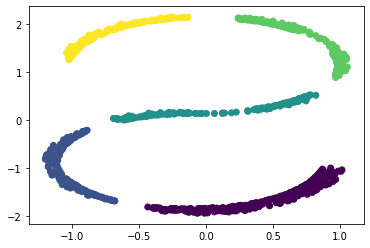

In [38]:
embedding = manifold.MDS(n_components=2)
dataset5_transformed = embedding.fit_transform(dataset5)
plt.scatter(dataset5_transformed[:, 0], dataset5_transformed[:, 1],c=lable7)
plt.show()

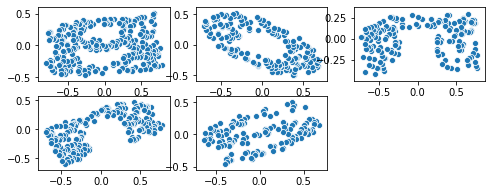

In [73]:
lable1=np.argwhere(lable7==0)
lable2=np.argwhere(lable7==1)
lable3=np.argwhere(lable7==2)
lable4=np.argwhere(lable7==3)
lable5=np.argwhere(lable7==4)

n1=len(lable1)
n2=len(lable2)
n3=len(lable3)
n4=len(lable4)
n5=len(lable5)

part1 = manifold.MDS(n_components=2).fit_transform(dataset5[lable1].reshape(n1,3))
part2 = manifold.MDS(n_components=2).fit_transform(dataset5[lable2].reshape(n2,3))
part3 = manifold.MDS(n_components=2).fit_transform(dataset5[lable3].reshape(n3,3))
part4 = manifold.MDS(n_components=2).fit_transform(dataset5[lable4].reshape(n4,3))
part5 = manifold.MDS(n_components=2).fit_transform(dataset5[lable5].reshape(n5,3))


plt.figure(figsize=(8,3))


ax1 = plt.subplot(2,3,1)
sns.scatterplot(part1[:,0],part1[:,1],ax=ax1)

ax2 = plt.subplot(2,3,2)
sns.scatterplot(part2[:,0],part2[:,1],ax=ax2)

ax3 = plt.subplot(2,3,3)
sns.scatterplot(part3[:,0],part3[:,1],ax=ax3)

ax4 = plt.subplot(2,3,4)
sns.scatterplot(part4[:,0],part4[:,1],ax=ax4)

ax5 = plt.subplot(2,3,5)
sns.scatterplot(part5[:,0],part5[:,1],ax=ax5)


Use MDS get the 2D plot, the shape is a 'S',and it made by 5 parts. Next I plot each lable, the shape of them is the English charster"B,O,U,N,S"

## Part 5. Multi-dimensional Scaling and PCA

This is a continuation problem of the part 5 in project 2. Use Multi-dimensional Scaling to plot the points in data2 and label your clusters by different colors (set k=7 in k-means). Use PCA to do the same thing.

In [20]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

filename='weather.csv'
df = pd.read_csv(filename)
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)

rcParams['figure.figsize'] = (14,10)
llon=-140
ulon=-50
llat=40
ulat=65
df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()
new_data = df[['xm','ym','Tx','Tm','Tn']].to_numpy()
new_data = np.nan_to_num(new_data)
new_data = StandardScaler().fit_transform(new_data)


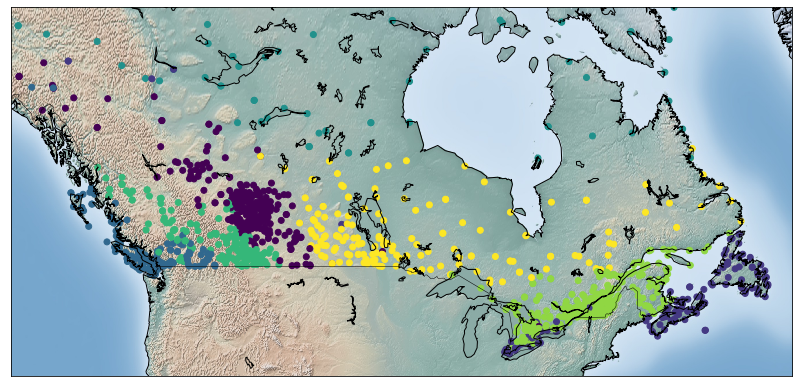

In [21]:
embedding = manifold.MDS(n_components=2)
new_data_transformed = embedding.fit_transform(new_data)


km1=KMeans(n_clusters=7).fit(new_data_transformed)
labels1=km1.labels_
centers=km1.cluster_centers_


#plot the map
my_map1 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 
my_map1.drawcoastlines()
my_map1.drawcountries()
my_map1.shadedrelief()


## this is to change longitude and latitude to coordinates

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
new_data_transformed[:,0]= xs.tolist()
new_data_transformed[:,1] =ys.tolist()


# 
plt.scatter(new_data_transformed[:,0] , new_data_transformed[:,1], c=labels1)


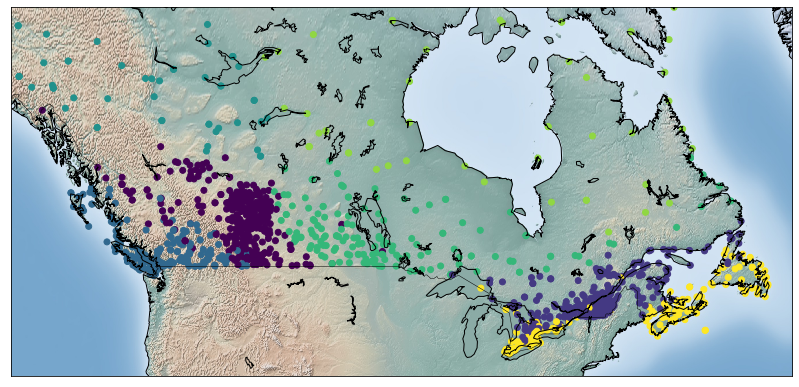

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(new_data)
new_data_pca = pca.transform(new_data)


km2=KMeans(n_clusters=7).fit(new_data_pca)
labels2=km2.labels_
centers=km2.cluster_centers_

#plot the map
my_map2 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 
my_map2.drawcoastlines()
my_map2.drawcountries()
my_map2.shadedrelief()


## this is to change longitude and latitude to coordinates

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
new_data_pca[:,0]= xs.tolist()
new_data_pca[:,1] =ys.tolist()


# 
plt.scatter(new_data_pca[:,0] , new_data_pca[:,1], c=labels2)

# <font color="blue"> Submit your notebook and a pdf version of it on canvas.</font>